<a href="https://colab.research.google.com/github/Aleksandra-Shukova/Ai-learning/blob/main/python/practic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Корректировки задания**

- новый класс наследует старый, и туда уже дописаны необходимые методы, т.к. не удалось угадать с функциональностью класса от предыдущего пз, поскольку задачи не были сформулированы на момент написания
- я не разобрался в том что такое cmd ctt pv ptt max min crt и прочее в примере, поэтому сделал собственную регулировку высоты
- класс подразумевает возможность установки произвольной тяги двигателя, но для упрощения мат.модели работает в режиме вкл/выкл
 - из условия, что на заданной высоте скорость равна 0, вычисляет время dt
 - если предсказанная высота больше заданной, робот отключает двигатель
 - в теории должен быть апериодический процесс выхода на высоту, но так как момент отключения двигателя выбирается дискретно, то есть "перерегулировка",
 - чем меньше шаг времени, тем меньше перерегулировка
- в задании не указывалось сколько требуется висеть на заданной высоте, я ограничил это по времени (был бы доступ к tkinter, было бы интересно менять высоту по кнопке)

Ai learning
 - python
  - pz4

ПЗ4  1. Разработать систему управления для Вини-Пуха.
Которая должна выполнять следующие действия:
- Взлет на заданную высоту
- Висение и поедание меда (опционально)
- Посадка (опционально)
- Нарисовать диаграмму состояний
- Реализовать передачу команд по MQTT
(опционально)

In [64]:
class myRobot4: # Вариант 1
    def __init__(self, speed, gravity=9.8, mass=1):
        '''Comments special for Knkn:
        Функция инициализации объекта класса Robot
        здесь не нужна начальная скорость ,
        поскольку вычисление координат не зависит явно от v0 (initial speed)
        self.thrust      #thrust of own engine of robot
        self.g = gravity
        self.timer = 0
        self.speed       #speed of robot
        self.height      #height of robot
        self.mass        #mass of robot
        self.crash = False    #langing flag
'''
        self.thrust = 0
        self.g = gravity
        self.timer = 0
        self.height = 0
        self.speed = speed
        self.mass = mass
        self.crash = False


    def set_engine(self, thrust=0):
        '''Устанавливает значение тяги двигателя
        противодействует силе тяжести
        эта функция должна вызываться при нажатии клавиши
'''
        self.thrust = thrust
    def engine_on_off(self):
        '''включает и выключает двигатель при нажатии на кнопку,
        требуется написать, слушать клавиатуру...
        Не принимает параметры, не возвращает.
'''
        pass
    def set(self, dt):
        '''Вычисляет текущее положение робота
        принимает значение частоты обновления экрана
        будет работать во время обновления экрана в бесконечном цикле

'''
        g = self.g
        self.timer += dt
        self.height = max(self.height + self.speed *dt - (g-self.thrust)*dt**2/2, 0)
        if self.height > 0 :
            self.speed = self.speed - (g-self.thrust)*dt
        else:
            self.speed = 0
            self.crash = True
        data_string = f"timer = {self.timer:5.2f} height = {self.height:6.1f} speed = {(self.speed):6.1f}"
        return data_string #[self.timer, self.speed, self.height]

    def predict_height(self, dt):
        '''Возвращает значение высоты
        через заданный промежуток времени dt'''
        g = self.g
        return max(self.height + self.speed *dt - (g-self.thrust)*dt**2/2, 0)

    def predict_speed(self, dt):
        '''Возвращает значение скорости
        через заданный промежуток времени dt
        0 если робот к тому времени упадет'''
        g = self.g
        still_in_air = max(self.height + self.speed *dt - (g-self.thrust)*dt**2/2, 0)
        if still_in_air:
            return self.speed - (g-self.thrust)*dt
        return 0


#help(Robot)

In [65]:
# new functions

class myRobot41( myRobot4 ):
    '''Наследование класса myRobot4
    Методы для автоматизации контроля высоты
'''
    def predict_height_engineoff(self, dt, ):
        '''Возвращает значение высоты
        через заданный промежуток времени dt
        при условии выключенного двигателя'''
        g = self.g
        return max(self.height + self.speed *dt - (g)*dt**2/2, 0)

    def do_i_reach(self, height):
        '''Вычисляет максимальную высоту параболы, траектории
        Возвращает true если она достигнута
'''
        #if i turn off engine
        dt = abs(self.speed / self.g) #speed==0
        if self.predict_height_engineoff( dt ) > height :
            return True
        return False

In [62]:
import time
import matplotlib.pyplot as plt
import numpy as np


rocket = myRobot41( 0 )
gap = 0.2 #sec
goal_height = 100

thrust = 15 #g=9.8
rocket.set_engine( thrust )

myHeight = np.array([])
myTime = np.array([])

while not rocket.crash:
    #real time simulation
    #time.sleep( gap ) #sec

    #reach goal height
    if rocket.do_i_reach( goal_height ):
        rocket.set_engine( 0 )
    else:
        rocket.set_engine( thrust )

    #change height
    if rocket.timer > 20:
        goal_height = 30

    #landing
    if rocket.timer > 40:
        goal_height = 0
    print( rocket.set(gap) )

    myHeight = np.append(myHeight, [rocket.height])
    myTime = np.append(myTime, [rocket.timer])

timer =  0.20 height =    0.1 speed =    1.0
timer =  0.40 height =    0.4 speed =    2.1
timer =  0.60 height =    0.9 speed =    3.1
timer =  0.80 height =    1.7 speed =    4.2
timer =  1.00 height =    2.6 speed =    5.2
timer =  1.20 height =    3.7 speed =    6.2
timer =  1.40 height =    5.1 speed =    7.3
timer =  1.60 height =    6.7 speed =    8.3
timer =  1.80 height =    8.4 speed =    9.4
timer =  2.00 height =   10.4 speed =   10.4
timer =  2.20 height =   12.6 speed =   11.4
timer =  2.40 height =   15.0 speed =   12.5
timer =  2.60 height =   17.6 speed =   13.5
timer =  2.80 height =   20.4 speed =   14.6
timer =  3.00 height =   23.4 speed =   15.6
timer =  3.20 height =   26.6 speed =   16.6
timer =  3.40 height =   30.1 speed =   17.7
timer =  3.60 height =   33.7 speed =   18.7
timer =  3.80 height =   37.5 speed =   19.8
timer =  4.00 height =   41.6 speed =   20.8
timer =  4.20 height =   45.9 speed =   21.8
timer =  4.40 height =   50.3 speed =   22.9
timer =  4

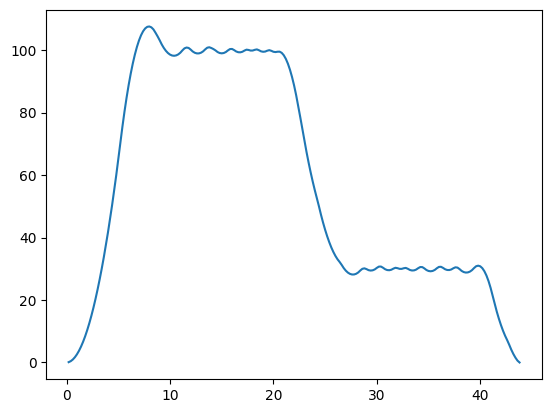

In [63]:
plt.plot(myTime, myHeight)
plt.show()